# COMS 3251 Spring 2022: Homework 4

**Instructions**: Solve all problems and type up your solutions in this notebook. Each solution should appear in a new text or code cell immediately following the given problem. Written problems should include work and steps in addition to the answers; $\LaTeX$ is highly recommended, but plaintext is also acceptable if it is understandable. You may use Python for any problem unless otherwise stated. Coding solutions should be free of errors, and all outputs should be left in the notebook for submission.

**Submission**: Submit a PDF printout of this notebook to Gradescope (not the .ipynb file). One way to do so is to download and then open the file in Google Colab (accessible from your LionMail account). Inspect to make sure that all cells are expanded and outputs are present, and then "print as PDF". Then upload the file to Gradescope. Please be sure to tag your pages.

All submitted work must be your own. Cases of academic dishonesty will be addressed following the policies outlined on the course syllabus.

In [2]:
# RUN THIS FIRST
import numpy as np
import matplotlib.pyplot as plt

# Problem 1 (30 points)

In the following code cell, we have defined a 1D array `pop2010`, which gives the population of the US per age group in 2010 (in millions). The 0th element is the number of individuals in the age group 0 to 1, the 1st element is the number in the age group 1 to 2, and so on up to the last element for the age group 99 to 100.



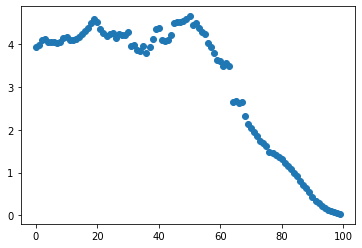

In [3]:
# US population in 2010 (millions)
pop2010 = np.array([3.94415, 3.97807, 4.09693, 4.11904, 4.06317, 4.05686, 4.06638,
                    4.03058, 4.04649, 4.14835, 4.17254, 4.11442, 4.10624, 4.11801,
                    4.16598, 4.24282, 4.31614, 4.39529, 4.50085, 4.58523, 4.51913,
                    4.35429, 4.26464, 4.19857, 4.24936, 4.26235, 4.15231, 4.24887,
                    4.21525, 4.22308, 4.28567, 3.97022, 3.98685, 3.88015, 3.83922,
                    3.95643, 3.80209, 3.93445, 4.12188, 4.3648 , 4.38327, 4.11498,
                    4.0761 , 4.10511, 4.2115 , 4.50887, 4.51976, 4.53526, 4.5388 ,
                    4.6059 , 4.66029, 4.46463, 4.50085, 4.38035, 4.292  , 4.25471,
                    4.03751, 3.93639, 3.79493, 3.64127, 3.62113, 3.4926 , 3.56318,
                    3.48388, 2.65713, 2.68076, 2.63914, 2.64936, 2.32367, 2.14232,
                    2.04312, 1.94932, 1.86427, 1.73696, 1.68449, 1.62008, 1.47107,
                    1.45533, 1.40012, 1.37119, 1.30851, 1.21287, 1.16142, 1.07481,
                    0.98572, 0.91472, 0.81421, 0.71291, 0.64062, 0.538  , 0.43556,
                    0.34499, 0.28139, 0.21698, 0.16944, 0.12972, 0.09522, 0.06814,
                    0.0459 , 0.03227])

age = np.arange(pop2010.size)
plt.scatter(age, pop2010);

1. Suppose we want to fit a line to this dataset, i.e., we want to fit the model $y = \beta_0 + \beta_1 x$, where $x$ is the lower bound of an age group between 0 and 99, and $y$ is the predicted population (in millions). Compute the least-squares fit and print the $\hat \beta_i$ coefficients and the sum of squared prediction errors. Display the predicted line overlaid on the scattered data in the same plot. 

2. Repeat the above but with a quadratic model $y = \beta_0 + \beta_1 x + \beta_2 x^2$. Again print the $\hat \beta_i$ coefficients and the sum of squared errors, and display the prediction overlaid on the data. Is this a better or worse model for fitting the given data and why?

3. Now suppose that we try a model in which a prediction is a function of *other, nearby predictions*: an **auto-regressive model**. This is described by the equation $$y_{t+1} = \beta_1 y_t + \beta_2 y_{t-1} + \cdots + \beta_M y_{t-M+1}.$$ Give a brief explanation of how $M$, an integer between 1 and $t$, can affect the prediction $y_{t+1}$.

4. Suppose $M=6$. Construct the design matrix $X$ to set up the least squares problem $X \beta = y$. Although $y$ contains 100 data points, we must remove the first 6, since we can only use the full model starting with the 7th observation. $X$ will therefore be a $94 \times 6$ matrix. Print the first 10 rows of $X$ as output.

5. Compute the least-squares fit and print the $\hat \beta_i$ coefficients and the sum of squared prediction errors. Then plot the fitted line (the predictions given by $\hat y = X \hat \beta$) on the same plot as the observed data $y$ with the first 6 observations removed. Briefly compare these results with the quadratic fit.

WRITTEN SOLUTIONS HERE 
1. Code is down below.

2. The quadratic model is the better fit for the given dataset. This can be recognized both by: 1) observing the fitting line and its geometry; 2) comparing the SSE values for both models. The quadratic's SSE is $\approx$ 12.56, where the linear model's SSE is $\approx$ 61.72 

3. $M$ is used to show how many previous observations have been used by the current model. The larger $M$'s value gets, the better the current model's prediction is expected to be. That occurs because a larger value for $M$ corresponds to a larger number of betas ($\beta$) & previous observations ($y$).

4. If we know that $M = 6$, then the equation we have is the following: $$y_{t+1} = \beta_1 y_t + \beta_2 y_{t-1} + \beta_3 y_{t-2} + \beta_4 y_{t-3}+ \beta_5 y_{t-4} + \beta_6 y_{t-5}$$
The above equation corresponds to the following function:
$$f(x) = \displaystyle\sum_{n=1}^{6} \beta_i y_{t-i+1}$$
In matrix multiplication terms this would be written as:
$$
\begin{bmatrix}
    y_t^{(1)} & y_{t-1}^{(1)} & y_{t-2}^{(1)} & y_{t-3}^{(1)}  & y_{t-4}^{(1)}  & y_{t-5}^{(1)} \\
    y_t^{(2)} & y_{t-1}^{(2)} & y_{t-2}^{(2)} & y_{t-3}^{(2)}  & y_{t-4}^{(2)}  & y_{t-5}^{(2)} \\
    ... & ... & ... & ... & ... & ... \\
    y_t^{(100)} & y_{t-1}^{(100)} & y_{t-2}^{(100)} & y_{t-3}^{(100)}  & y_{t-4}^{(100)}  & y_{t-5}^{(100)}
\end{bmatrix}
\begin{bmatrix}
    \beta_1 \\
    \beta_2 \\
    \beta_3 \\
    \beta_4 \\
    \beta_5 \\
    \beta_6
\end{bmatrix} = 
\begin{bmatrix}
    y_{t+1}^{(1)} \\
    y_{t+1}^{(2)} \\
    ... \\
    y_{t+1}^{(100)} \\
\end{bmatrix}
$$
We can see that row $i$ from $X$ contains 6 elements from the pop2010 numpy array in reverse order. The code below outputs the desired result.

5. Similarly to our logic in 1.2 for comparing the linear and quadratic models, we can clearly see that the autoregressive model makes much better predictions than the quadratic one. Moreover, the SSE for the autoregressive model is 1.37 vs. 12.56 for the quadratic. Geometrically, we can see that the autoregressive model's line goes through almost every data point that we're presented with. The quadratic model is off by a lot in several places (i.e. $x = 53; x = 35; x = 75;$ etc...)


beta = [ 5.32407435 -0.04519501]
SSE = [61.71927115]


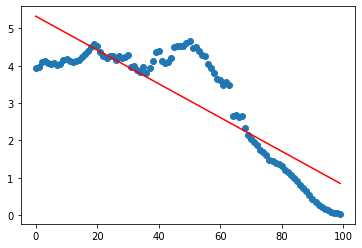

In [4]:
# 1.1

m = 100
x = age
y = pop2010

X = np.column_stack((np.ones(m), x))
sol = np.linalg.lstsq(X, y, rcond=None)
beta = sol[0]
SSE = sol[1]

plt.scatter(x,y)
plt.plot(x, X @ beta, 'r')
print("beta =", beta)
print("SSE =", SSE)

beta = [ 3.80266102e+00  4.79527477e-02 -9.40886412e-04]
SSE = [12.56234663]


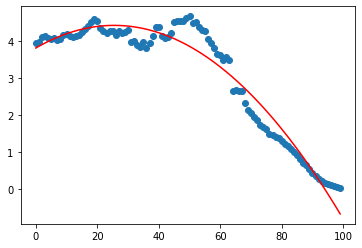

In [5]:
# 1.2

m = 100
x = age
y = pop2010

X = np.column_stack(
    (np.ones(m), 
     x, np.power(x, 2))
  )
sol = np.linalg.lstsq(X, y, rcond=None)
beta = sol[0]
SSE = sol[1]

plt.scatter(x,y)
plt.plot(x, X @ beta, 'r')
print("beta =", beta)
print("SSE =", SSE)

In [4]:
# 1.4

X = np.zeros(
    (94, 6)
)

for i in range(94):
    X[i] = pop2010[i:(i + 6)]
    X[i] = X[i][::-1] # reverse

print(X[:10])

[[4.05686 4.06317 4.11904 4.09693 3.97807 3.94415]
 [4.06638 4.05686 4.06317 4.11904 4.09693 3.97807]
 [4.03058 4.06638 4.05686 4.06317 4.11904 4.09693]
 [4.04649 4.03058 4.06638 4.05686 4.06317 4.11904]
 [4.14835 4.04649 4.03058 4.06638 4.05686 4.06317]
 [4.17254 4.14835 4.04649 4.03058 4.06638 4.05686]
 [4.11442 4.17254 4.14835 4.04649 4.03058 4.06638]
 [4.10624 4.11442 4.17254 4.14835 4.04649 4.03058]
 [4.11801 4.10624 4.11442 4.17254 4.14835 4.04649]
 [4.16598 4.11801 4.10624 4.11442 4.17254 4.14835]]


beta = [
    beta_value 0: 	 1.130613618831
    beta_value 1: 	-0.105266373114
    beta_value 2: 	 0.038232850325
    beta_value 3: 	-0.045149255041
    beta_value 4: 	 0.328024701016
    beta_value 5: 	-0.351297319857
]
SSE = 1.3746070589931538


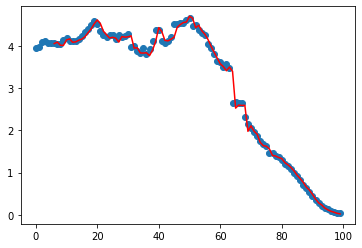

In [5]:
# 1.5

sol = np.linalg.lstsq(X, pop2010[6:], rcond=None)
beta = sol[0]
SSE = sol[1][0]
y = X @ beta

plt.scatter(age, pop2010)
plt.plot(age[6:], y, "r-")

print("beta = [")
for number, beta_value in enumerate(beta):
    print(f"    beta_value {number}:", end=" ")
    if beta_value >= 0.0:
        print("\t {0:.12f}".format(beta_value))
    else:
        print("\t{0:.12f}".format(beta_value))

print("]")

print("SSE =", SSE)

# Problem 2 (15 points)

In the following code cell, we have defined a 1D array `miles`, which describes 
US road traffic in total vehicle miles traveled per month between 2000 and 2014. If you look carefully at the data, you should see that there is a periodic component, with traffic peaking in summer and declining in winter. There is also a slow increase in overall traffic in the long term. We can describe this model as follows, where $\%$ indicates the modulo operator:
$$y_t =  \beta_{t \% 12} + \beta_{12} t$$


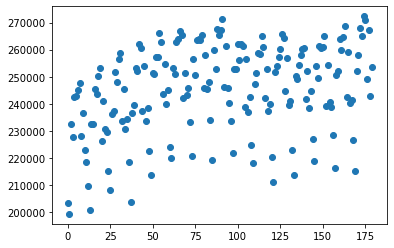

In [8]:
miles = np.array([203442, 199261, 232490, 227698, 242501, 242963, 
                  245140, 247832, 227899, 236491, 222819, 218390,
                  209685, 200876, 232587, 232513, 245357, 243498, 
                  250363, 253274, 226312, 241050, 230511, 229584,
                  215215, 208237, 236070, 237226, 251746, 247868, 
                  256392, 258666, 233625, 245556, 230648, 234260,
                  218534, 203677, 236679, 239415, 253244, 252145, 
                  262105, 260687, 237451, 254048, 233698, 238538,
                  222450, 213709, 251403, 250968, 257235, 257383, 
                  265969, 262836, 243515, 254496, 239796, 245029,
                  224072, 219970, 253182, 250860, 262678, 263816, 
                  267025, 265323, 242240, 251419, 243056, 245787,
                  233302, 220730, 256645, 250665, 263393, 263805, 
                  263442, 265229, 245624, 257961, 245367, 248208,
                  233799, 219221, 259740, 252734, 267646, 265475, 
                  267179, 271401, 246050, 261505, 245928, 240444,
                  233469, 221728, 252773, 252699, 261890, 256152, 
                  262152, 261228, 238701, 256402, 237009, 242326,
                  224840, 218031, 247433, 251481, 258793, 258487, 
                  265026, 260838, 242034, 252683, 237342, 239774,
                  220177, 210968, 251858, 254014, 257401, 260159, 
                  265861, 264358, 244712, 256867, 239656, 240932,
                  222724, 213547, 250410, 249309, 254145, 258025, 
                  260317, 260623, 241764, 252058, 238278, 244615,
                  226834, 218714, 253785, 249567, 261355, 260534, 
                  260880, 264983, 239001, 254170, 240734, 238876,
                  228607, 216306, 250496, 252116, 263923, 260023, 
                  264570, 268609, 242582, 259281, 240146, 241365,
                  226444, 215166, 252089, 257947, 268075, 264868, 
                  272335, 271018, 249125, 267185, 242816, 253618])

t = np.arange(miles.size)
plt.scatter(t, miles)

1. Give an interpretation of this model. How does the first term impact the prediction at a given time $t$? What about the second term? What does it mean if $\beta_{12}=0$?

2. Construct the design matrix $X$ to set up the least squares problem $X \beta = y$. Since $\beta = (\beta_0, ..., \beta_{12})$ and there are $180$ data points in $y$, $X$ should be a $180 \times 13$ matrix. You may find `numpy.tile` to be helpful. Print the first 10 rows of $X$ as output.

3. Compute the least-squares fit and print the $\hat \beta_i$ coefficients and the sum of squared prediction errors. Then plot the fitted line (the predictions given by $\hat y = X \hat \beta$) on the same plot as the observed data $y$. Briefly comment on the relative values of the $\hat \beta_{t \%12}$ coefficients vs the $\hat \beta_{12}$ coefficient.

WRITTEN SOLUTIONS HERE 

1. Let's start analyzing this problem by created a table with the first several values for t in order to get a sense of what the values for y would look like:
[link for the table](https://ibb.co/gr45g8v).
After analyzing the table, we can see where the trends come from. It is easy to notice that if we know $t \in [1, 12]$ and $k \in \N$ or $k = 0$, then the following is true: 
$ y_{t+12k} - y_t = (\beta_{(t+12k)\%12} + \beta_{12}(t+12k)) - (\beta_{(t\%12)} + \beta_{12}t) = \beta_{(t\%12)} + \beta_{12}(t+12k) - (\beta_{(t\%12)} + \beta_{12}t) = \beta_{12}(t+12k) - \beta_{12}t = 12k\beta_{12}$. This means that all our y values are just the initial 12 y values with an added value of $12k\beta_{12}$ for some constant k. And because $(\uparrow k) \leftrightarrow \ (\uparrow y)$, then it's expected that over time the temperature will rise, because we can easily see that $\beta_{12} > 0$ from the given graph. Another thing we can infer from the above relation is that if we fix a certain month, the "evolution" of its temperature depends only on the temperature of the month in the first given year (i.e. 2000) and the value of $\beta_{12}$. Having said that, we can easily make the observation that every month will have a fixed temperature for all years from 2000 until 2014 if we set $\beta_{12} = 0$. We can deduce this either from the equation that we derived for the differene between two values of y that are "away" from each other by a multiple of 12 index or just by looking at the table and noticing the trend.
For simplicity, we can also describe $\beta_{t \% 12}$ as the periodic variable and $\beta_{12}$ as the growth rate.

2. Look at the code output below.

3. By observing the periodic variables $\hat\beta_{t \% 12}$ we can see an expected behavior in the results - a rise until approximately $\hat\beta_6$, followed by a decrease. This is due to the change of seasons and the transition from winter (the early and late months) to summer (middle months). Compared to the $\hat\beta_{12}$ values, the $\hat\beta_{t \% 12}$ values are much larger ($\approx 10^{4}$ times) which suggests that the traffic's increase over time is not significant on the timescale of months.

In [10]:
# 2.2

arrays_to_stack = (
    np.tile(
        np.eye(12),
        (miles.size // 12, 1)
    ), t
)

X = np.column_stack(
    arrays_to_stack
)

print(X[:10])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 6.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 7.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 8.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 9.]]


beta = [
    beta_value 0: 	 214768.458333333343
    beta_value 1: 	 205108.046329364151
    beta_value 2: 	 239511.100992063293
    beta_value 3: 	 238852.355654761777
    beta_value 4: 	 249433.476984126930
    beta_value 5: 	 248391.198313492001
    beta_value 6: 	 253197.986309523723
    beta_value 7: 	 253644.374305555539
    beta_value 8: 	 231129.495634920662
    beta_value 9: 	 244401.750297618943
    beta_value 10: 	 228747.004960317427
    beta_value 11: 	 230912.926289682480
    beta_value 12: 	 96.878670634935
]
SSE = 5081029045.614273


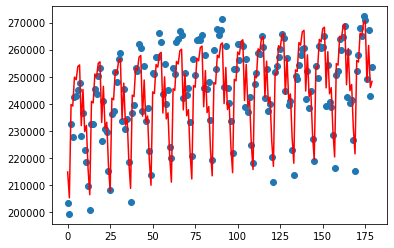

In [11]:
# 2.3

sol = np.linalg.lstsq(X, miles, rcond=None)
beta = sol[0]
SSE = sol[1][0]

y = X @ beta

plt.scatter(t, miles)
plt.plot(t, y, 'r')

print("beta = [")
for number, beta_value in enumerate(beta):
    print(f"    beta_value {number}:", end=" ")
    if beta_value >= 0.0:
        print("\t {0:.12f}".format(beta_value))
    else:
        print("\t{0:.12f}".format(beta_value))

print("]")

print("SSE =", SSE)

# Problem 3 (20 points)

Recall that the set of real-valued functions $\mathbb F$ is a vector space. Consider a subspace of $\mathbb F$ consisting of periodic functions with frequencies $0$, $1$, and $2$ (rad/sec). A basis for this subspace is as follows:

$$ \mathcal B = \{1, \cos x, \sin x, \cos 2 x, \sin 2 x \} $$

We can thus form a correspondence between such functions and their *coordinate vectors*:

$$f(x)=a+b\cos x + c\sin x + d\cos 2x + e\sin 2x \leftrightarrow \mathbf u = (a,b,c,d,e)$$

1. The derivative $T(f) = \frac{df}{dx}$ is a linear transformation on this subspace. Compute the derivatives of each of the basis "vectors" in $\mathcal B$ and express each as a coordinate vector.

2. Derive the matrix $A$ that implements $T$ as $\mathbf v = A \mathbf u$, where $\mathbf u$ is the coordinate vector of $f$ and $\mathbf v$ is the coordinate vector of $\frac{df}{dx}$. Are $A$, and by extension $T$, invertible?

3. Give bases for the range and kernel of the linear transformation $T$. You should write these in terms of the basis functions given above rather than as vectors associated with $A$. What are their dimensions? Is $T$ one-to-one, onto, both, or neither?

4. Suppose we consider $T$ on a subspace of the current subspace by removing the basis vector $1$. Explain why $T$ is now invertible and state what this "inverse function" is.

ENTER YOUR SOLUTIONS HERE 

1. Computing the derivatives: 


* $\frac{d}{dx} (1) = 0$
* $\frac{d}{dx} (cos(x)) = -\sin(x)$
* $\frac{d}{dx} (sin(x)) =  \cos(x)$
* $\frac{d}{dx} (cos(2x)) = -2\sin(2x)$
* $\frac{d}{dx} (sin(2x)) =  2\cos(2x)$

Now, expressing the derivatives of the basis "vectors" as a coordinate vector: $\frac{df}{dx} = 0a + (-\sin(x))b + (\cos(x))c + (-2\sin(2x))d + (2\cos(2x))e = -b\sin(x) + c\cos(x) -2d\sin(2x) + 2e\cos(2x)$
Now we can see that:


* $T(1) = 0 \rightarrow (0, 0, 0, 0, 0)$ 
* $T(\cos(x)) = -\sin(x) \rightarrow (0, 0, -1, 0, 0)$ 
* $T(\sin(x)) = \cos(x) \rightarrow (0, 1, 0, 0, 0)$ 
* $T(\cos(2x)) = -2\sin(2x) \rightarrow (0, 0, 0, 0, -2)$ 
* $T(\sin(2x)) = 2\cos(2x) \rightarrow (0, 0, 0, 2, 0)$ 

2. $A = [ \\
    T((1, 0, 0, 0, 0)), \\ T((0, 1, 0, 0, 0)), \\ T((0, 0, 1, 0, 0)), \\ T((0, 0, 0, 1, 0)), \\ T((0, 0, 0, 0, 1)) \\ ] = 
    \begin{bmatrix} 
        0 & 0 & 0 & 0 &  0 \\
        0 & 0 & 1 & 0 &  0 \\
        0 & -1 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 &  2 \\
        0 & 0 & 0 & -2 & 0 \\
    \end{bmatrix}$

    We can see that the first row of A consists only of zeroes.

3. The kernel's base can be found if we find the set of vectors $\mathbf u$ for which the following is true: $A\mathbf u = 0$. Because of the previous oobservations, it's easy to see that for any arbitrary constant $k$, the vector $\mathbf u = (k, 0, 0, 0, 0)$ satisties this requirement. This means that a basis would be $\{(1, 0, 0, 0, 0)\}$. It follows that a basis for the kernel would be $\{(1)\}$. For the range, we should take a look into the column space of $A$. We can observe that the last 4 columns of $A$ are, in fact, pivot columns and, thus, can be used as a basis. This means that a basis would be $\{ \\(0, 1, 0, 0, 0), \\ (0, 0, 1, 0, 0), \\ (0, 0, 0, 1, 0), \\  (0, 0, 0, 0, 1)\\ \}$. The basis for the range - in terms of the given basis functions - would consist of: $\{(\cos(x), \sin(x), \cos(2x), \sin(2x))\}$. The dimensions are: 

* the kernel: 1
* the range: 4

The transformation $T$ is not one-to-one and it is not onto because $A$ is neither full row, nor full column rank. This can also be seen by making the observation that by differentiating any constant, the transform (i.e. $\frac{d}{dx}$) will yield 0 and by integrating (i.e. the reverse operation) any function $f(x)$, we'll get an arbitrary constant $k \in \R$.


4. If we have the base vector $\mathbf v = 1$ contributes to the first row and column of zeroes in $A$. By removing it we'll be left with:
$$A = \begin{bmatrix} 
        0 & 1 & 0 &  0 \\
        -1 & 0 & 0 & 0 \\
        0 & 0 & 0 &  2 \\
        0 & 0 & -2 & 0 \\
      \end{bmatrix}$$
      Now we can see that $A$ is full rank and square and, thus, invertible. Our new function form: $f(x) = a\cos(x) + b\sin(x) + c\cos(2x) + d\sin(2x)$ and its derivative can be written in the same form. The inverse function would be the integral $\rightarrow T^{-1}(f(x)) = \int f(x)dx$ when we equate the arbitrary integration constant to 0.

# Problem 4 (20 points)

Recall that in $\mathbb R^2$, a counterclockwise rotation about the origin by an angle $\theta$ can be achieved with the *orthogonal* rotation matrix

$$\text{Rot}(\theta) = \begin{bmatrix} \cos\theta & -\sin\theta \\
\sin\theta & \cos\theta \end{bmatrix}.$$

If you like, you may use [SymPy](https://www.sympy.org/en/index.html) to perform symbolic computations after writing out the necessary expressions.

1. What is the $QR$ decomposition of $\text{Rot}(\theta)$? What is the projection matrix that projects 2-vectors onto the column space of $\text{Rot}(\theta)$? Briefly explain how you can arrive at both answers without explicitly computing these quantities.

2. Use matrix multiplication to show that the composition of two rotations $\text{Rot}(\theta)$ and $\text{Rot}(\phi)$ is also a rotation. What is the angle of the composition rotation, and does the order of composition matter?

3. Consider a vector $\mathbf v = (x,y)$, which has magnitude $||\mathbf v|| = \sqrt{x^2+y^2}$. Derive and simplify the magnitude of $\text{Rot}(\theta)\mathbf v$. How do rotations affect vector lengths?

4. Suppose that we are given vectors relative to the basis $\mathcal B = \{(1,2),(3,4)\}$. We wish to apply the same rotation transformation and then write the outputs relative to the basis $\mathcal C = \{(1,3),(2,4)\}$. Derive a single transformation matrix that achieves this.

ENTER YOUR SOLUTIONS HERE 

1. We already know that $Q$ is orthogonal. This would mean that $R$ should basically be the identity matrix $I$ (i.e. $\begin{bmatrix} 1 & 0 \\
0 & 1 \end{bmatrix}$), because we'd have the equation $Q = QR$. The projection matrix for the column space of $\text{Rot}(\theta)$ would be the following: $P = QQ^T$. If we perform the multiplication, we'd get: 
$$
\begin{bmatrix} 
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta 
\end{bmatrix}
\begin{bmatrix} 
\cos\theta & \sin\theta \\
-\sin\theta & \cos\theta 
\end{bmatrix} = \\ = 
\begin{bmatrix} 
(\cos\theta)^2 + (\sin\theta)^2 & 0 \\
0 & (\sin\theta)^2 + (\cos\theta)^2
\end{bmatrix} = \\ = 
\begin{bmatrix} 
1 & 0 \\
0 & 1
\end{bmatrix} = I
$$
P.S. we could have also made the observation that $Q$ is a square matrix, so $P$ was expected to be $I$.

2. We can see that the two rotations -separately- look like this: 
$$
\text{Rot}(\theta) = 
\begin{bmatrix} 
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta 
\end{bmatrix}; 
\text{Rot}(\phi) = 
\begin{bmatrix} 
\cos\phi & -\sin\phi \\
\sin\phi & \cos\phi
\end{bmatrix}
$$
Now, if we try to multiply the 2 matricies:


    1. $$\text{Rot}(\theta) \text{Rot}(\phi) =
         \begin{bmatrix} 
            \cos\theta \cos\phi - \sin\theta \sin\phi & -\cos\theta \sin\phi - \sin\theta \cos\phi \\
            \sin\theta \cos\phi + \cos\theta \sin\phi & -\sin\theta \sin\phi + \cos\theta \cos\phi
         \end{bmatrix} = 
       $$
       Now we can make use of the trigonometric identities:

        * $\cos\theta \cos\phi - \sin\theta \sin\phi = \cos(\theta + \phi)$
        * $-\cos\theta \sin\phi - \sin\theta \cos\phi = - (\cos\theta \sin\phi + \sin\theta \cos\phi) = - \sin(\theta + \phi)$
        * $\cos\theta \sin\phi + \sin\theta \cos\phi = \sin(\theta + \phi)$
        * $-\sin\theta \sin\phi + \cos\theta \cos\phi = \cos\theta \cos\phi -\sin\theta \sin\phi = \cos(\theta + \phi)$
        Substituting in the matrix that we got after the multiplication:
        $$\text{Rot}(\theta) \text{Rot}(\phi) =
         \begin{bmatrix} 
            \cos(\theta + \phi) & - \sin(\theta + \phi) \\
            \sin(\theta + \phi) & \cos(\theta + \phi)
         \end{bmatrix}
       $$

    2. $$\text{Rot}(\phi) \text{Rot}(\theta) =
         \begin{bmatrix} 
            \cos\phi \cos\theta - \sin\phi \sin\theta & -\cos\phi \sin\theta - \sin\phi \cos\theta \\
            \sin\phi \cos\theta + \cos\phi \sin\theta & -\sin\phi \sin\theta + \cos\phi \cos\theta
         \end{bmatrix}
       $$
       However, we can easily see that if we rearrange the matrix that we just got, we can acquire the previous one: 
       $$\text{Rot}(\phi) \text{Rot}(\theta) =
         \begin{bmatrix} 
            \cos\phi \cos\theta - \sin\phi \sin\theta & -\cos\phi \sin\theta - \sin\phi \cos\theta \\
            \sin\phi \cos\theta + \cos\phi \sin\theta & -\sin\phi \sin\theta + \cos\phi \cos\theta
         \end{bmatrix} = \\
       = \begin{bmatrix} 
            \cos\theta \cos\phi - \sin\theta \sin\phi & -\cos\theta \sin\phi - \sin\theta \cos\phi \\
            \sin\theta \cos\phi + \cos\theta \sin\phi & -\sin\theta \sin\phi + \cos\theta \cos\phi
         \end{bmatrix}
       $$
       This means that $\text{Rot}(\theta) \text{Rot}(\phi) = \text{Rot}(\phi) \text{Rot}(\theta)$ and concludes our analysis because from the final result in the previous case it's clear that $\text{Rot}(\theta) \text{Rot}(\phi) = \text{Rot}(\theta + \phi)$

3. $$\text{Rot}(\theta) \mathbf v = 
         \begin{bmatrix} 
            \cos\theta & -\sin\theta \\
            \sin\theta & \cos\theta 
         \end{bmatrix}
         \begin{bmatrix} 
         x \\ y
         \end{bmatrix} = 
         \begin{bmatrix} 
            \cos\theta x + (-\sin\theta) y \\ 
            \sin\theta x + \cos\theta y
         \end{bmatrix} = 
         \begin{bmatrix} 
            x\cos\theta -y\sin\theta \\ 
            x\sin\theta + y\cos\theta 
         \end{bmatrix} \\ 
         \rightarrow ||\text{Rot}(\theta) \mathbf v|| = \sqrt{(x\cos\theta -y\sin\theta)^2 + (x\sin\theta + y\cos\theta)^2} = \\ 
         = \sqrt{x^2(\cos\theta)^2 - 2xy\sin\theta \cos\theta + y^2 (\sin\theta)^2 + x^2(\sin\theta)^2 + 2xy\sin\theta \cos\theta + y^2 (\cos\theta)^2} = \\ = \sqrt{x^2(\cos\theta)^2 + y^2 (\sin\theta)^2 + x^2(\sin\theta)^2 + y^2 (\cos\theta)^2} = \sqrt{x^2((\sin\theta)^2 + (\cos\theta)^2) + y^2((\sin\theta)^2 + (\cos\theta)^2)} = \sqrt{x^2 + y^2}$$
         Finally, we see that, indeed: $\text{Rot}(\theta) \mathbf v = \sqrt{x^2 + y^2}$. This expression does not depend on $\theta$ and since we started by taking an arbitrary $\theta$ (because we did not make any assumptions based on $\theta$), it means that all possible rotations preserve the length of the vector $\mathbf v$.

4. We can define the matrices: 
   * $B = \begin{bmatrix} 
            1 & 3 \\
            2 & 4 
         \end{bmatrix}$
   * $C = \begin{bmatrix} 
            1 & 2 \\
            3 & 4 
         \end{bmatrix}$
   
   From the code below we can see that:
   $C^{-1} = \begin{bmatrix} 
               -2 & 1 \\
               1.5 & -0.5 
             \end{bmatrix}$ 
   We can achieve what's described in the problem by computing the following: $C^{-1}\text{Rot}(\theta)B$
   $$\begin{bmatrix} 
         -2 & 1 \\
         1.5 & -0.5 
      \end{bmatrix} 
      \begin{bmatrix} 
         \cos\theta & -\sin\theta \\
         \sin\theta & \cos\theta 
      \end{bmatrix}
      \begin{bmatrix} 
            1 & 3 \\
            2 & 4 
      \end{bmatrix}
      $$
      The code below computes the desired quantity:
      $$  
      \begin{bmatrix} 
            5\sin\theta & 11\sin\theta - 2\cos\theta \\
            -3.5\sin\theta + 0.5\cos\theta & -7.5\sin\theta + 2.5\cos\theta
      \end{bmatrix}
      $$



In [3]:
# 4.4
import sympy

B = sympy.Matrix(
   [[1, 3],
    [2, 4]]
)
C = sympy.Matrix(
   [[1, 2],
    [3, 4]]
)

C_inverse = C.inv()

theta = sympy.symbols("theta")
RotationMatrix = sympy.Matrix(
   [
      [sympy.cos(theta), sympy.Mul(sympy.sin(theta), -1)],
      [sympy.sin(theta), sympy.cos(theta)],
   ]
)
print("C Inverse Matrix:")
display(C_inverse)

print("Matrix multiplication final output:")
display(C_inverse * RotationMatrix * B)

C Inverse Matrix:
Matrix multiplication final output:


Matrix([
[ -2,    1],
[3/2, -1/2]])

Matrix([
[                  5*sin(theta),      11*sin(theta) - 2*cos(theta)],
[-7*sin(theta)/2 + cos(theta)/2, -15*sin(theta)/2 + 5*cos(theta)/2]])

# Problem 5 (15 points)

We will visualize the effects of different transformations on a 2D image. The function below takes in a transformation matrix and then applies it to the image to change its default appearance before showing it. You don't have to worry about understanding all the code here. Run the code cell, which includes a call to the procedure with the identity transformation, and examine the output. 


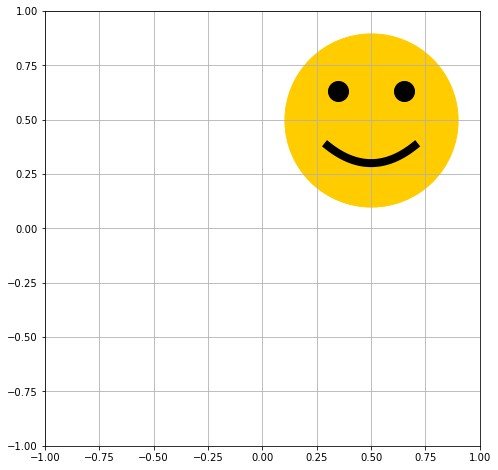

In [12]:
def show_picture(T):
  # set up figure and plot
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(1,1,1, aspect=1)
  ax.set_xlim(-1,1)
  ax.set_ylim(-1,1)
  ax.grid()
  
  # plot the face and eyes as individual circles
  face = T.dot(np.array([.5,.5,1]))
  eyes = T.dot(np.array([[.35,.65],[.63,.63],[1,1]]))
  ax.scatter(face[0], face[1], c='#FFCC00', s=30000, label="face")
  ax.scatter(eyes[0,:], eyes[1,:], c='k', s=400, label="eyes")

  # compute sequence of points for the smile and plot them
  smile_x = np.linspace(.3, .7, 100)
  smile_y = 2*(smile_x-.5)**2 + .3
  smile = T.dot(np.vstack((smile_x, smile_y, np.ones(smile_x.shape))))
  ax.plot(smile[0,:], smile[1,:], c='k', linewidth=8, label="smile")


show_picture(np.eye(3))

Before starting, you may find the following reminder about some different kinds of 2D transformations to be helpful (courtesy Wikipedia):

<img src=https://upload.wikimedia.org/wikipedia/commons/2/2c/2D_affine_transformation_matrix.svg width=500>

1. Your first task is to implement a transformation that consists of a scaling along the $y$ direction by a factor of $0.5$, rotation about the origin of $-\pi/4$ radians, and then a translation along the $x$ axis by $-1$ unit. Compute and return the correct transformation matrix in the function below. Please define the individual transformation matrices in your function and use NumPy to compute the composed transformation. Then run the function and show the output in your submission.

Note: Our code only fully transfoms the eyes and mouth of the face. The face itself (yellow circle) only translates.

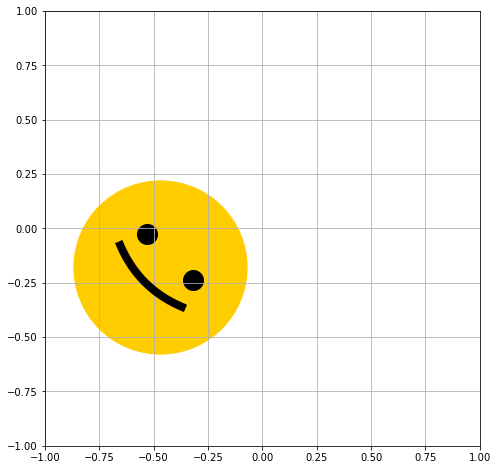

In [13]:
def part1():
  Scale = np.array(
    [
      [1, 0,   0],
      [0, 0.5, 0],
      [0, 0,   1]
    ]
  )

  angle_of_rotation = -np.pi/4
  Rotate = np.array(
    [
      [np.cos(angle_of_rotation), -np.sin(angle_of_rotation), 0],
      [np.sin(angle_of_rotation),  np.cos(angle_of_rotation), 0],
      [0, 0, 1]
    ]
  )

  Translate = np.array(
    [
      [1, 0, -1],
      [0, 1,  0],
      [0, 0,  1]
    ]
  )

  return Translate@Rotate@Scale

# RUN AND SHOW OUTPUT
show_picture(part1())

2. You may have noticed that many of the transformations are defined relative to the origin or the fixed $x$ and $y$ axes. But sometimes it is desirable to define transformations relative to a different point, for example, the center of the object. Implement a transformation in the procedure below that produces a rotation of $\theta$ about the specified point. As a hint, you should again think about doing a composition of several transformations.


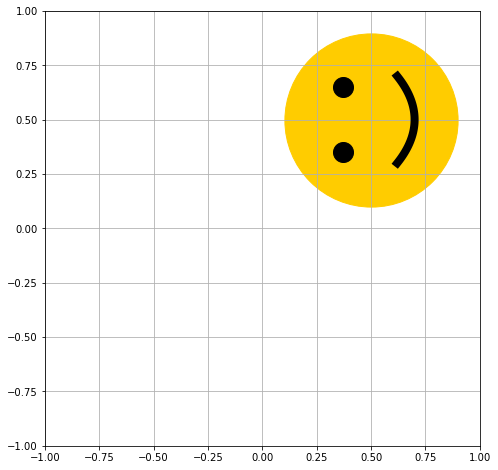

In [14]:
# point is a NumPy array containing the x and y coordinates of the center of rotation
# theta is the angle of rotation

def part2(point, theta):
  X_rotate, Y_rotate = point[0], point[1]

  TranslateToOrigin = np.array(
    [
      [1, 0, -X_rotate],
      [0, 1, -Y_rotate],
      [0, 0,         1]
    ]
  )

  Rotate = np.array(
    [
      [np.cos(theta), -np.sin(theta), 0],
      [np.sin(theta),  np.cos(theta), 0],
      [0, 0, 1]
    ]
  )

  TranslateBack = np.array(
    [
      [1, 0, X_rotate],
      [0, 1, Y_rotate],
      [0, 0,        1]
    ]
  )
  
  return TranslateBack@Rotate@TranslateToOrigin

# ROTATE ABOUT (0.5,0.5) BY 90 DEGREES
# RUN AND SHOW OUTPUT
show_picture(
  part2(
      np.array([0.5, 0.5]),
      np.pi/2
    )
  )

For your last task, you will investigate a transformation that is given to you. Consider the following composite transformation, which you can visualize by running the cell below:

$$ T = \begin{bmatrix} 1 & 0 & -1 \\ 0 & -1 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$ 


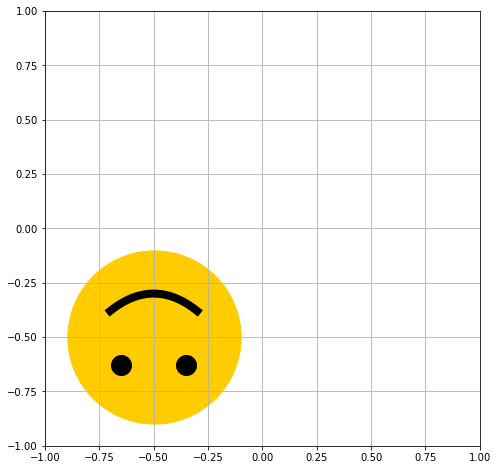

In [15]:
show_picture(np.array([[1,0,-1],
                       [0,-1,0],
                       [0,0,1]]))

3. Come up with a possible sequence of **two** basic transformations from the Wikipedia reference above that can produce $T$. State what they are and verify that the matrix product matches the overall transformation matrix. Does the order in which the two transformation steps are applied matter in this case? Why or why not?

The two basic transformations can be found below. The order does that we apply the transformations in does *NOT* matter. That is because the transformations only deal with either the X or the Y axis at a time. Thus, they are independent of each other and their order can be switched without any difference in the final output.

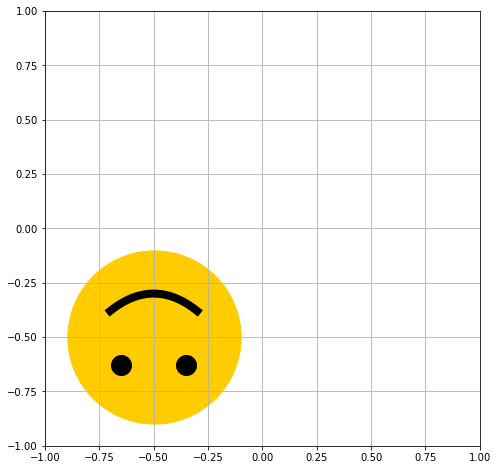

In [17]:
def part3():
  Translate = np.array(
    [
      [1, 0, -1],
      [0, 1,  0],
      [0, 0,  1]
    ]
  )

  Reflect_About_X_Axis = np.array(
    [
      [1, 0,  0],
      [0, -1, 0],
      [0, 0,  1]
    ]
  )

  return Reflect_About_X_Axis@Translate


# RUN AND SHOW OUTPUT
show_picture(part3())